---
title: Homework 4
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [17]:
acs["RNTP"].isna().sum()

202728

In [16]:
acs["VALP"].isna().sum()


# acs["VALP"].isna().sum(), acs["RNTP"].isna().sum()

97644

In [10]:
print(acs.shape[0])

# the sum of missing values in VALP and RNTP is greater than the number of rows in the dataset.

276632


Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.


### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

In [11]:
#Q1.b 
(acs["VALP"].isna() | acs["RNTP"].isna()).mean() == 1.0

True

In [19]:
hint = pd.Series([True, False, False, True])
~ hint


0    False
1     True
2     True
3    False
dtype: bool

In [23]:
#Q1.c
owners = acs.dropna(subset=['VALP'])
print(owners.shape[0])


178988


In [25]:
acs["VALP"].notna().sum()

# it matches the number of rows in owner dataset

178988

In [26]:
#Q1.d
# Proportion of rows missing "HINCP" values
missing_hincp_proportion = owners["HINCP"].isna().mean()
print(f"Proportion of missing HINCP values: {missing_hincp_proportion}")

# Median value of non-missing "HINCP" values
median_hincp = owners["HINCP"].median()
print(f"Median HINCP value: {median_hincp}")

# Fill missing "HINCP" values with the median
owners["HINCP"].fillna(median_hincp, inplace=True)

# Verify that there are no missing values in "HINCP"
owners['HINCP'].isna().sum()

Proportion of missing HINCP values: 0.01331932867007844
Median HINCP value: 75000.0


0

In [29]:
#Q1.e 
# Create renters table with non-missing RNTP values
renters = acs.dropna(subset=['RNTP'])

# Median impute missing HINCP values for renters
median_hincp_renters = renters["HINCP"].median()
renters["HINCP"].fillna(median_hincp_renters, inplace=True)

# Compute statistics for owners
owners_mean = owners["HINCP"].mean()
owners_median = owners["HINCP"].median()
owners_iqr = owners["HINCP"].quantile(0.75) - owners["HINCP"].quantile(0.25)
owners_std = owners["HINCP"].std()

# Compute statistics for renters
renters_mean = renters["HINCP"].mean()
renters_median = renters["HINCP"].median()
renters_iqr = renters["HINCP"].quantile(0.75) - renters["HINCP"].quantile(0.25)
renters_std = renters["HINCP"].std()

# Print statistics
print(f"Owners - Mean: {owners_mean}, Median: {owners_median}, IQR: {owners_iqr}, Std: {owners_std}")
print(f"Renters - Mean: {renters_mean}, Median: {renters_median}, IQR: {renters_iqr}, Std: {renters_std}")

# Owners have higher location values. Owners have more spread. This menans that owners have hgher income and more variability in their income than renters.


Owners - Mean: 103101.59041946946, Median: 75000.0, IQR: 85100.0, Std: 107811.39422510812
Renters - Mean: 56607.35456808833, Median: 40000.0, IQR: 49600.0, Std: 64594.46491847548


### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.



## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.

### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.

### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?

### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |



## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

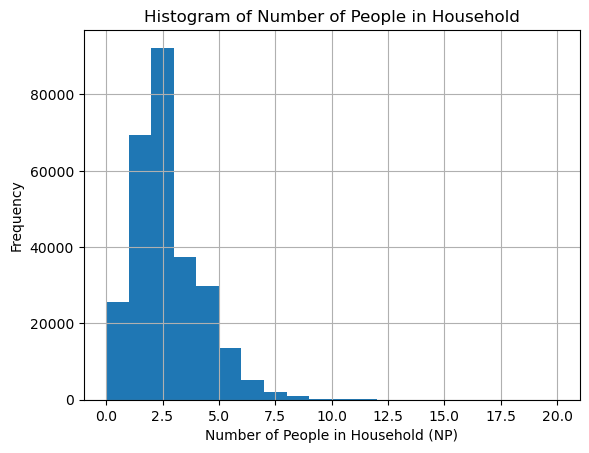

In [30]:
#Q2.a
acs['NP'].hist(bins=20)
plt.xlabel('Number of People in Household (NP)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of People in Household')
plt.show()

# The distribution of the number of people in the household (NP) is right-skewed, with most households having fewer people. The spread is wide, but the majority of the data is concentrated aroun 2.5

In [31]:
#Q2.b
# Compute statistics for the NP column
np_mean = acs['NP'].mean()
np_median = acs['NP'].median()
np_iqr = acs['NP'].quantile(0.75) - acs['NP'].quantile(0.25)
np_std = acs['NP'].std()
np_quantile_skewness = (acs['NP'].quantile(0.75) + acs['NP'].quantile(0.25) - 2 * np_median) / np_iqr
np_coefficient_skewness = 3 * (np_mean - np_median) / np_std

# Print statistics
print(f"Mean: {np_mean}")
print(f"Median: {np_median}")
print(f"IQR: {np_iqr}")
print(f"Standard Deviation: {np_std}")
print(f"Quantile Skewness: {np_quantile_skewness}")
print(f"Coefficient of Skewness: {np_coefficient_skewness}")

Mean: 2.208764712686891
Median: 2.0
IQR: 2.0
Standard Deviation: 1.5263892280569145
Quantile Skewness: 0.0
Coefficient of Skewness: 0.41031090009586973


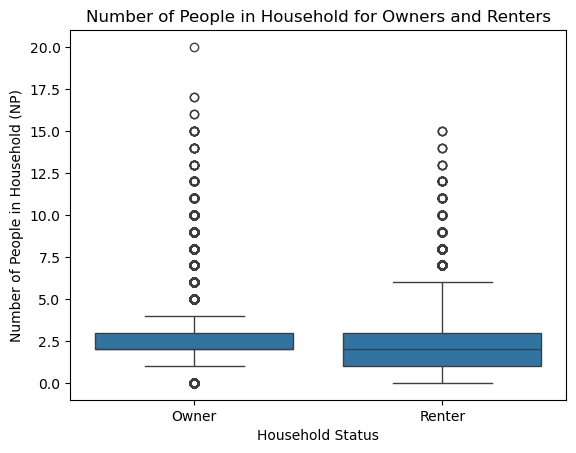

In [33]:

# Q2.c
# Create a new column to distinguish between owners and renters
owners['Status'] = 'Owner'
renters['Status'] = 'Renter'

# Combine the two dataframes
combined = pd.concat([owners, renters])

# Create the boxplot
sb.boxplot(x='Status', y='NP', data=combined)
plt.xlabel('Household Status')
plt.ylabel('Number of People in Household (NP)')
plt.title('Number of People in Household for Owners and Renters')
plt.show()

# Both distributions have a similar median
# There are more outliers in the owner's distribution. The spread is greater in renters than in owners.

### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?
